<a href="https://colab.research.google.com/github/Ibrahim341998/Russian-troll-tweets-using-nlp/blob/main/Troll_tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Russian Troll tweets analysis using NLP.**

### Data cleaning and reshaping the data.

In [41]:
#import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

%matplotlib inline

In [3]:
## Merge Multiple 1M Rows CSV file
# 1. defines path to csv files
path = "/content/drive/MyDrive/russian-troll-tweets/"

# 2. creates list with files to merge based on name convention
file_list = [path + f for f in os.listdir(path) if f.startswith('IRAhandle_tweets_')]

# 3. creates empty list to include the content of each file converted to pandas DF
csv_list = []
 
# 4. reads each (sorted) file in file_list, converts it to pandas DF and appends it to the csv_list
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

# 5. merges single pandas DFs into a single DF, index is refreshed 
tweets_df = pd.concat(csv_list, ignore_index=True)

# 6. Single DF is saved to the path in CSV format, without index column
tweets_df.to_csv(path + 'tweets_full.csv', index=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
tweets_df.tail()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,File_Name
2946202,2260338140,POLITICS_T0DAY,Порошенко призвал к полной перезагрузке правит...,United States,Russian,2/16/2016 22:20,2/16/2016 22:20,92,887,12934,...,0,NonEnglish,0,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://www.interfax.ru/world/494930,NaN,IRAhandle_tweets_9.csv
2946203,2260338140,POLITICS_T0DAY,Турецкая атомная бомба появится в 2023 году. ...,United States,Russian,2/16/2016 22:25,2/16/2016 22:25,92,887,12935,...,0,NonEnglish,0,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://svpressa.ru/war21/article/142481/,NaN,IRAhandle_tweets_9.csv
2946204,2260338140,POLITICS_T0DAY,История одной татуировки. Тату на предплечье:...,United States,Russian,2/16/2016 22:31,2/16/2016 22:31,92,887,12936,...,0,NonEnglish,0,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://manzal.livejournal.com/359548.html,NaN,IRAhandle_tweets_9.csv
2946205,2260338140,POLITICS_T0DAY,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",United States,Russian,2/16/2016 22:35,2/16/2016 22:35,92,887,12937,...,0,NonEnglish,0,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,NaN,NaN,IRAhandle_tweets_9.csv
2946206,2260338140,POLITICS_T0DAY,На популярном видеохостинге YouTube опубликова...,United States,Russian,2/16/2016 22:40,2/16/2016 22:40,92,887,12938,...,0,NonEnglish,0,2260338140,699725139705987072,http://twitter.com/politics_t0day/statuses/699...,http://youtu.be/qPzCuKvVn9M,NaN,NaN,IRAhandle_tweets_9.csv


In [5]:
tweets_df.isna().sum().sort_values(ascending=False)

tco3_step1            2931207
tco2_step1            2235090
post_type             1648625
tco1_step1             845971
region                   8818
content                     1
external_author_id          0
account_category            0
article_url                 0
tweet_id                    0
alt_external_id             0
new_june_2018               0
account_type                0
retweet                     0
author                      0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
File_Name                   0
dtype: int64

In [6]:
tweets_df['account_type'].unique()

array(['Right', 'Russian', 'Koch', 'Italian', 'Left', '?', 'German',
       'Spanish', 'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'Ukranian', 'news', 'Ebola ', 'Portuguese', 'ZAPOROSHIA', 'Uzbek'],
      dtype=object)

In [7]:
tweets_df['post_type'].unique()

array([nan, 'RETWEET', 'QUOTE_TWEET'], dtype=object)

In [8]:
tweets_df['region'].unique()

array(['Unknown', nan, 'United States', 'Italy', 'United Arab Emirates',
       'Japan', 'Israel', 'Azerbaijan', 'Egypt', 'United Kingdom',
       'Russian Federation', 'Turkey', 'Iraq', 'Germany', 'France',
       'Ukraine', 'Serbia', 'Belarus', 'Greece', 'Czech Republic',
       'Finland', 'Latvia', 'Estonia', 'Canada', 'Spain', 'Sweden',
       'Denmark', 'Switzerland', 'Saudi Arabia', 'Afghanistan',
       'Hong Kong', 'Austria', 'Malaysia', 'Samoa', 'India',
       'Iran, Islamic Republic of', 'Mexico'], dtype=object)

In [9]:
tweets_df['region'].value_counts()[:10]

United States           2046709
Unknown                  561994
Azerbaijan                96333
United Arab Emirates      74675
Russian Federation        37589
Belarus                   27802
Germany                   27178
United Kingdom            18048
Italy                     13474
Iraq                      11117
Name: region, dtype: int64

In [10]:
tweets_df['account_type'].value_counts()[:10]

Right         711668
Russian       704917
local         459220
Left          427141
Hashtager     241786
news          139006
Commercial    121904
German         91511
Italian        15680
?              13539
Name: account_type, dtype: int64

In [11]:
#for proportion of each language gets tweet and retweet.
tweets_df['language'].value_counts(normalize=True)[:10]

English               0.718506
Russian               0.207366
German                0.029524
Ukrainian             0.013125
Italian               0.006131
Serbian               0.003218
Uzbek                 0.003168
Bulgarian             0.003135
LANGUAGE UNDEFINED    0.002824
Arabic                0.002576
Name: language, dtype: float64

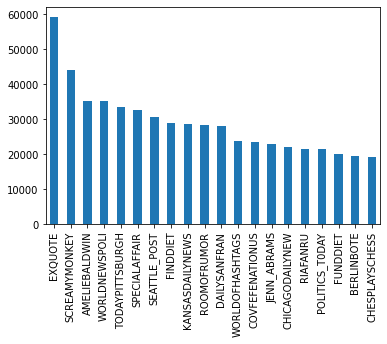

In [12]:
#'author' are the people who are the users of application .
#To know the top users who tweet or retweet. To get the knowledge of how there networks
#looks like.
tweets_df['author'].value_counts()[:20]
tweets_df['author'].value_counts()[:20].plot(kind='bar')

# Start cleaning the data

In [13]:
# There is large values of nan's needing to be replaced:
tweets_df['post_type'].fillna(value='Other_tweet',
                              inplace = True)

tweets_df['region'].fillna(value='Unknown',
                          inplace=True)

tweets_df['account_type']=tweets_df['account_type'].\
replace('?','Unknown')

tweets_df['account_type'].fillna(value='Unknown',
                                 inplace=True)

In [14]:
tweets_df['account_type'].unique()

array(['Right', 'Russian', 'Koch', 'Italian', 'Left', 'Unknown', 'German',
       'Spanish', 'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'Ukranian', 'news', 'Ebola ', 'Portuguese', 'ZAPOROSHIA', 'Uzbek'],
      dtype=object)

In [15]:
# drop few columns for data cleaning
tweets_df.drop(['tco3_step1','tco2_step1', 'tco1_step1'], axis=1, inplace=True)

In [16]:
tweets_df.isna().sum().sort_values(ascending=False)

content               1
external_author_id    0
post_type             0
article_url           0
tweet_id              0
alt_external_id       0
new_june_2018         0
account_category      0
retweet               0
account_type          0
updates               0
author                0
followers             0
following             0
harvested_date        0
publish_date          0
language              0
region                0
File_Name             0
dtype: int64

In [17]:
#Let's investigate the Nan values for each of the columns:

#We will drop this useless row:
tweets_df[tweets_df.loc[:,'content'].isna()==True]

row_to_drop = tweets_df[tweets_df.loc[:,'content'].\
                          isna()==True].index[0]

tweets_df.drop(row_to_drop,axis='index',inplace=True)

In [18]:
tweets_df = tweets_df.drop(['external_author_id','harvested_date','new_june_2018'],axis=1)
tweets_df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,alt_external_id,tweet_id,article_url,File_Name
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,Other_tweet,Right,0,RightTroll,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,Other_tweet,Right,0,RightTroll,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,1,RightTroll,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,Other_tweet,Right,0,RightTroll,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv


In [21]:
#Using regular expression we're gonna rid of this url links.

text_wo_http=[]
for i in tweets_df['content']:
  re_pattern=r'\b(?:http).+\b'
  re_p=r'http\S+'
  if type(i)==str and re.findall(re_pattern,i):
    text_wo_http.append(re.sub(re_p,'',i))
  else:
    text_wo_http.append(i)
  
len(text_wo_http)

2946206

In [22]:
tweets_df['content_without_http']=text_wo_http

In [23]:
tweets_df.columns

Index(['author', 'content', 'region', 'language', 'publish_date', 'following',
       'followers', 'updates', 'post_type', 'account_type', 'retweet',
       'account_category', 'alt_external_id', 'tweet_id', 'article_url',
       'File_Name', 'content_without_http'],
      dtype='object')

In [24]:
tweets_df.tail(8)

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,alt_external_id,tweet_id,article_url,File_Name,content_without_http
2946199,POLITICS_T0DAY,Украина и Россия договорились о взаимном возвр...,United States,Russian,2/16/2016 22:05,92,887,12931,Other_tweet,Russian,0,NonEnglish,2260338140,699716326131163137,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Украина и Россия договорились о взаимном возвр...
2946200,POLITICS_T0DAY,Авиация США летит к российским границам с учеб...,United States,Russian,2/16/2016 22:10,92,887,12932,Other_tweet,Russian,0,NonEnglish,2260338140,699717486535688192,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Авиация США летит к российским границам с учеб...
2946201,POLITICS_T0DAY,https://t.co/c4qNrR2a4U,United States,Russian,2/16/2016 22:15,92,887,12933,Other_tweet,Russian,0,NonEnglish,2260338140,699718717333184512,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,
2946202,POLITICS_T0DAY,Порошенко призвал к полной перезагрузке правит...,United States,Russian,2/16/2016 22:20,92,887,12934,Other_tweet,Russian,0,NonEnglish,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Порошенко призвал к полной перезагрузке правит...
2946203,POLITICS_T0DAY,Турецкая атомная бомба появится в 2023 году. ...,United States,Russian,2/16/2016 22:25,92,887,12935,Other_tweet,Russian,0,NonEnglish,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Турецкая атомная бомба появится в 2023 году. ...
2946204,POLITICS_T0DAY,История одной татуировки. Тату на предплечье:...,United States,Russian,2/16/2016 22:31,92,887,12936,Other_tweet,Russian,0,NonEnglish,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,История одной татуировки. Тату на предплечье:...
2946205,POLITICS_T0DAY,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",United States,Russian,2/16/2016 22:35,92,887,12937,Other_tweet,Russian,0,NonEnglish,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,"Индонезия, Китай, золото и isis #Эксклюзив@pol..."
2946206,POLITICS_T0DAY,На популярном видеохостинге YouTube опубликова...,United States,Russian,2/16/2016 22:40,92,887,12938,Other_tweet,Russian,0,NonEnglish,2260338140,699725139705987072,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,На популярном видеохостинге YouTube опубликова...


In [25]:
!pip install google_trans_new

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Replace single and double quotes which are going to mess us up!
str_repl=[]
for i in tweets_df['content_without_http'].values:
  re_pat=r'^"|"$'
  re_pat2=r"^'|'$"
  #if type(i)==str and re.findall(re_pat,i):
    #str_repl.append(i.strip('"'))
  #elif type(i)==str and re.findall(re_pat2,i):
    #str_repl.append(i.strip("'"))
  #else:
    #str_repl.append(i.strip('"').strip("'"))
  str_repl.append(i.replace('"','').replace("'",''))

In [27]:
str_repl[:3]

['We have a sitting Democrat US Senator on trial for corruption and youve barely heard a peep from the mainstream media. ~ @nedryun ',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt ',
 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.  #BoycottNFL ']

In [28]:
#Our problems still exits and we need to investigate it further
tweets_df['content_without_http']=str_repl
tweets_df.tail()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,alt_external_id,tweet_id,article_url,File_Name,content_without_http
2946202,POLITICS_T0DAY,Порошенко призвал к полной перезагрузке правит...,United States,Russian,2/16/2016 22:20,92,887,12934,Other_tweet,Russian,0,NonEnglish,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Порошенко призвал к полной перезагрузке правит...
2946203,POLITICS_T0DAY,Турецкая атомная бомба появится в 2023 году. ...,United States,Russian,2/16/2016 22:25,92,887,12935,Other_tweet,Russian,0,NonEnglish,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Турецкая атомная бомба появится в 2023 году. ...
2946204,POLITICS_T0DAY,История одной татуировки. Тату на предплечье:...,United States,Russian,2/16/2016 22:31,92,887,12936,Other_tweet,Russian,0,NonEnglish,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,История одной татуировки. Тату на предплечье:...
2946205,POLITICS_T0DAY,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",United States,Russian,2/16/2016 22:35,92,887,12937,Other_tweet,Russian,0,NonEnglish,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,"Индонезия, Китай, золото и isis #Эксклюзив@pol..."
2946206,POLITICS_T0DAY,На популярном видеохостинге YouTube опубликова...,United States,Russian,2/16/2016 22:40,92,887,12938,Other_tweet,Russian,0,NonEnglish,2260338140,699725139705987072,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,На популярном видеохостинге YouTube опубликова...


# Split data by English and Russian

In [29]:
#English

english_tweets=tweets_df[tweets_df['language']=='English']

#Russian
Russian_tweets=tweets_df[tweets_df['language']=='Russian']

# EDA and plotting

In [30]:
# we are only looking up for english language as the given the dataset is huge.
tr_eng = tweets_df[tweets_df['language']=='English']
tr_eng.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,alt_external_id,tweet_id,article_url,File_Name,content_without_http
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,Other_tweet,Right,0,RightTroll,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv,We have a sitting Democrat US Senator on trial...
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,Other_tweet,Right,0,RightTroll,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv,Marshawn Lynch arrives to game in anti-Trump s...
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,1,RightTroll,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv,Daughter of fallen Navy Sailor delivers powerf...
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,Other_tweet,Right,0,RightTroll,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv,JUST IN: President Trump dedicates Presidents ...
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,IRAhandle_tweets_1.csv,"19,000 RESPECTING our National Anthem! #StandF..."


In [31]:
#format names
tr_eng['account_type'].unique()

array(['Right', 'Koch', 'Italian', 'Russian', 'Left', 'Unknown', 'German',
       'Hashtager', 'Arabic', 'local', 'Commercial', 'French', 'news',
       'Ebola ', 'Portuguese', 'ZAPOROSHIA', 'Spanish'], dtype=object)

In [32]:
#convert column values to lowercase:
tr_eng_lwr = tr_eng['account_type'].map(lambda x: x.lower())

In [33]:
tr_eng['account_type']=tr_eng_lwr
tr_eng['account_type'].unique()
# we will deal with this error message also~ arrrrgg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['right', 'koch', 'italian', 'russian', 'left', 'unknown', 'german',
       'hashtager', 'arabic', 'local', 'commercial', 'french', 'news',
       'ebola ', 'portuguese', 'zaporoshia', 'spanish'], dtype=object)

# Plotting to get general idea of further EDA

In [34]:
#import files and datetime formatting, json parsing
import datetime

pd.set_option('mode.chained_assignment', None)

type(tr_eng['publish_date'][0]) # return string, need to format

# Convert str to date/time with pandas.
tr_eng['publish_date']=pd.to_datetime(tr_eng['publish_date'],
                                      infer_datetime_format=True
                                      )
tr_eng.sort_values('publish_date',ascending=True)
#change the timestamp to US dates
tr_eng['publish_date_Only']=tr_eng['publish_date'].\
dt.strftime('%m/%d/%Y')

#tr_eng.head()
#tr_eng['publish_date'].dtype

#Let's Look at the spike

* Only viewing the subsets English Only tweets

In [35]:
#get range to encapsulate before and after election 2016
mask = (tr_eng['publish_date'] > '08/31/2016') &\
(tr_eng['publish_date'] <= '01/01/02017')

tr_en_msk=tr_eng[mask].sort_values('publish_date')

tr_en_msk['publish_date_Only']=pd.\
to_datetime(tr_en_msk['publish_date_Only'])

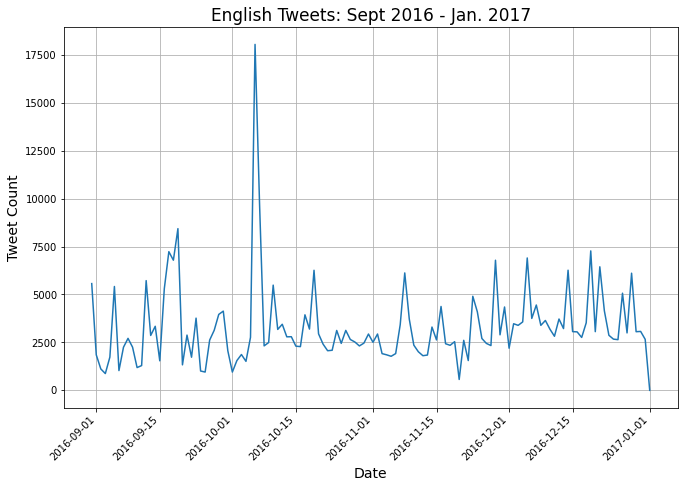

In [36]:
plt.figure(figsize=(11,7))

#Count the number of times a date appears and convert to dataframes
tweet_trend = pd.DataFrame(tr_en_msk['publish_date_Only'].\
                           value_counts())

# sort dates and get count by date:
dd=pd.to_datetime(tr_en_msk['publish_date_Only']).\
value_counts().sort_index()

plt.plot(dd)

plt.xticks(rotation=45,ha='right')
plt.title('English Tweets: Sept 2016 - Jan. 2017',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

# **Ok, What about the groups of trolls tweeted these** 
# **days?**

* These are the subset English tweets only!

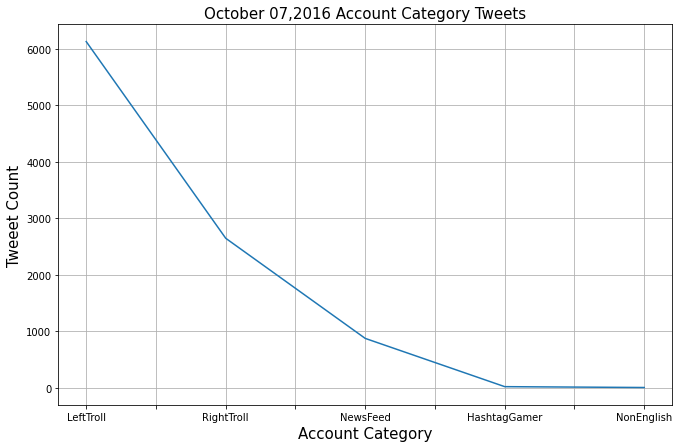

In [37]:
oct_7=tr_eng[tr_eng['publish_date_Only']=='10/07/2016']

plt.figure(figsize=(11,7))
oct_7['account_category'].value_counts().plot()

plt.grid(True)
plt.title('October 07,2016 Account Category Tweets',size=15)
plt.xlabel('Account Category',size=15)
plt.ylabel('Tweeet Count',size=15)
plt.show()

# Do some plot for Russians and compare:

In [38]:
#Due to complications with translating API's and Cost. We will not go with this approach
#But, I will do a comparison for plotting of tweets during election time

tr_russ = tweets_df[tweets_df['language']=='Russian']

pd.set_option('mode.chained_assignment', None)

tr_russ['publish_date']=pd.to_datetime(tr_russ['publish_date'],
                                       infer_datetime_format=True)

tr_russ.sort_values('publish_date',ascending=True)

#change format to US date
tr_russ['publish_date_Only']=tr_russ['publish_date'].\
dt.strftime('%m/%d/%Y')

mask_russ = (tr_russ['publish_date'] > '08/31/2016') &\
(tr_russ['publish_date'] <= '01/01/2017')

tr_russ_msk=tr_russ[mask_russ].sort_values('publish_date')

tr_russ_msk['publish_date_Only']=pd.\
to_datetime(tr_russ_msk['publish_date_Only'])

tr_russ_msk.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,alt_external_id,tweet_id,article_url,File_Name,content_without_http,publish_date_Only
255708,POLITICS_T0DAY,https://t.co/GTWHGEp3sC,United States,Russian,2016-08-31 00:10:00,110,994,18546,Other_tweet,Russian,0,NonEnglish,2260338140,770775638622044160,http://twitter.com/politics_t0day/statuses/770...,IRAhandle_tweets_10.csv,,2016-08-31
348544,RIAFANRU,"Экс-президент Польши считает, что страна на гр...",Belarus,Russian,2016-08-31 00:30:00,2902,11415,58453,Other_tweet,Russian,0,NonEnglish,2570574680,770780714707058690,http://twitter.com/riafanru/statuses/770780714...,IRAhandle_tweets_10.csv,"Экс-президент Польши считает, что страна на гр...",2016-08-31
2074371,INFOREACTOR,В Алеппо убит спикер ДАИШ https://t.co/KLNGc4...,United States,Russian,2016-08-31 01:00:00,1549,7661,17620,Other_tweet,Russian,0,NonEnglish,3369109175,770788302014312453,http://twitter.com/inforeactor/statuses/770788...,IRAhandle_tweets_6.csv,В Алеппо убит спикер ДАИШ,2016-08-31
255735,POLITICS_T0DAY,https://t.co/zFbi3tE2EQ,United States,Russian,2016-08-31 01:10:00,110,994,18547,Other_tweet,Russian,0,NonEnglish,2260338140,770790748992180224,http://twitter.com/politics_t0day/statuses/770...,IRAhandle_tweets_10.csv,,2016-08-31
2074372,INFOREACTOR,Крис Браун угрожал пистолетом одной из своих г...,United States,Russian,2016-08-31 01:20:00,1549,7661,17621,Other_tweet,Russian,0,NonEnglish,3369109175,770793314920624128,http://twitter.com/inforeactor/statuses/770793...,IRAhandle_tweets_6.csv,Крис Браун угрожал пистолетом одной из своих г...,2016-08-31


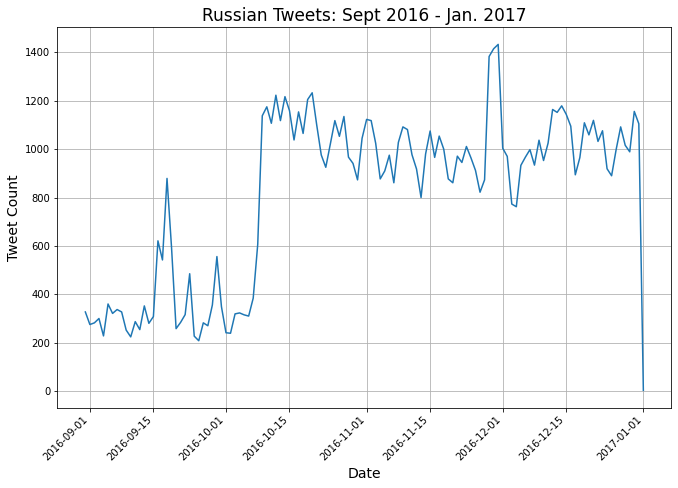

In [39]:
plt.figure(figsize=(11,7))

#Count the number of times a date appears and convert to dataframes
tweet_trend = pd.DataFrame(tr_russ_msk['publish_date_Only'].\
                           value_counts())

# sort dates and get count by date:
dd_russ=pd.to_datetime(tr_russ_msk['publish_date_Only']).\
value_counts().sort_index()

plt.plot(dd_russ)

plt.xticks(rotation=45,ha='right')
plt.title('Russian Tweets: Sept 2016 - Jan. 2017',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

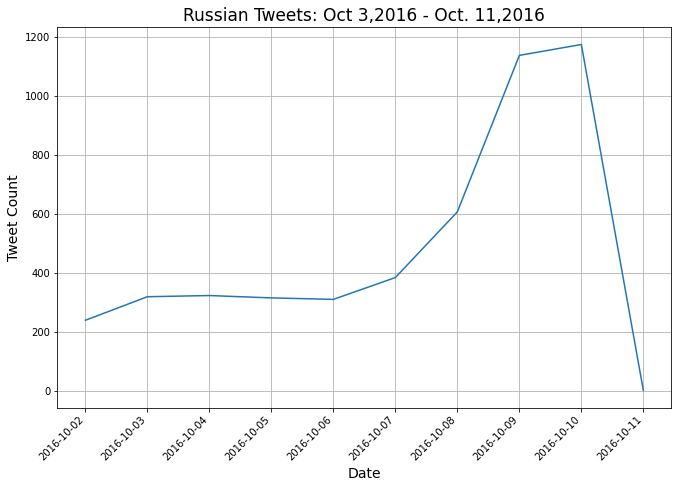

In [40]:
#let's zoom in on Oct 3-11 2016 Russian Tweets:

mask_russ_sub = (tr_russ['publish_date'] > '10/02/2016') &\
(tr_russ['publish_date'] <= '10/11/2016')

tr_russ_msk_sub=tr_russ[mask_russ_sub].sort_values('publish_date')

tr_russ_msk_sub['publish_date_Only']=pd.\
to_datetime(tr_russ_msk_sub['publish_date_Only'])

plt.figure(figsize=(11,7))

#sort dates and get count by date:
dd_russ_sub=pd.to_datetime(tr_russ_msk_sub['publish_date_Only']).\
value_counts().sort_index()

plt.plot(dd_russ_sub)
plt.xticks(rotation=45,ha="right")
plt.title('Russian Tweets: Oct 3,2016 - Oct. 11,2016',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

# **Plot All Data: account category by (follower vs following)**

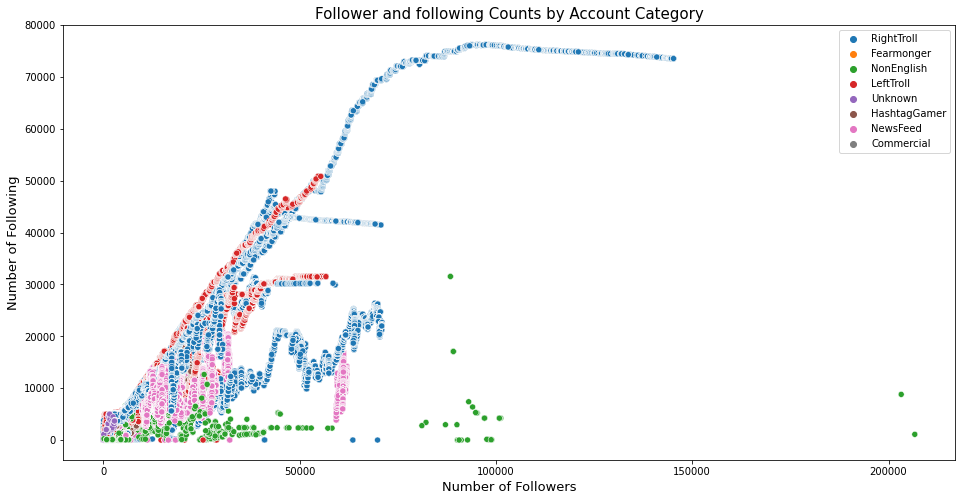

In [45]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following",
                     hue="account_category",data=tr_eng)
plt.title('Follower and following Counts by Account Category',
          fontsize = 15)
plt.xlabel("Number of Followers", fontsize=13)
plt.ylabel("Number of Following", fontsize=13)
plt.legend(loc='best')

# **Evaluate top 10 users over time**

In [42]:
tr_en_msk['author'].value_counts()[:10].index

Index(['AMELIEBALDWIN', 'HYDDROX', 'WORLDOFHASHTAGS', 'CHRIXMORGAN',
       'KANSASDAILYNEWS', 'CHICAGODAILYNEW', 'WORLDNEWSPOLI', 'SCREAMYMONKEY',
       'JAVONHIDP', 'BRIANAREGLAND'],
      dtype='object')

In [43]:
top_ten_auth_dtrng=list(tr_en_msk['author'].value_counts()[:10].index)

sub_en_auth=tr_en_msk.loc[:,[
    'author','publish_date_Only',
    'followers','following'
]]
top10_author_by_dte=sub_en_auth[sub_en_auth['author'].\
                                isin(top_ten_auth_dtrng)]

mi=top10_author_by_dte.sort_values(['publish_date_Only','author']).\
groupby(['publish_date_Only','author']).max()
mi

followers  following
publish_date_Only author                               
2016-08-31        BRIANAREGLAND          746        658
                  CHICAGODAILYNEW      19510      10039
                  CHRIXMORGAN          17350      11727
                  JAVONHIDP              836        718
                  KANSASDAILYNEWS      25413       7498
...                                      ...        ...
2016-12-31        HYDDROX               2271       2591
                  JAVONHIDP              826        450
                  KANSASDAILYNEWS      25320       4269
                  WORLDNEWSPOLI         3058       3322
2017-01-01        WORLDNEWSPOLI         3061       3321

[887 rows x 2 columns]

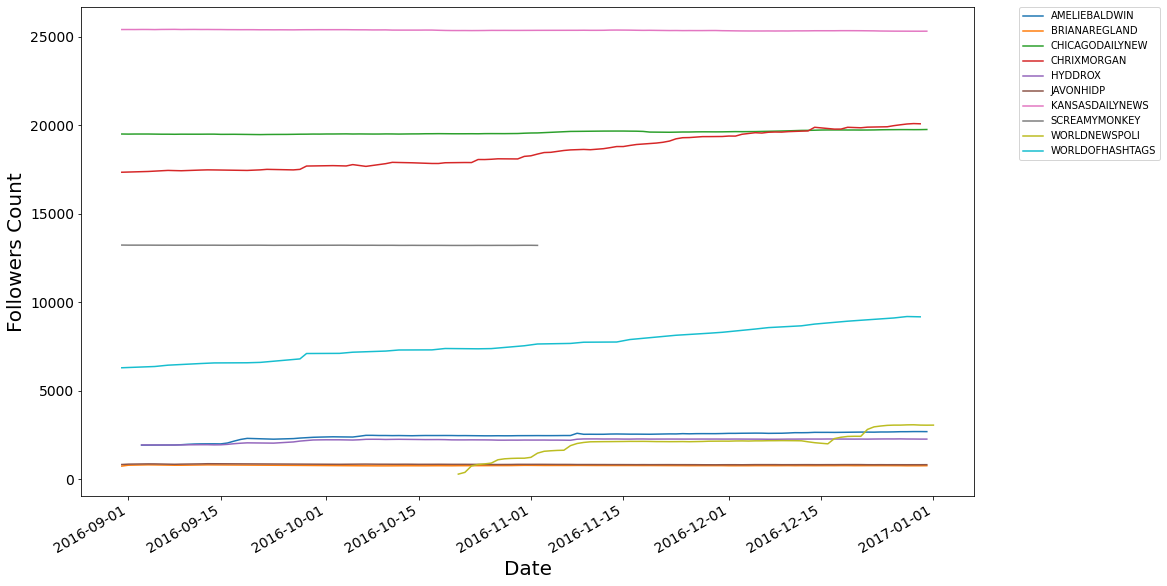

In [44]:
f=pd.DataFrame(list(mi.index),columns=["date","author"])

followers=pd.DataFrame(list(mi['followers']),
                       columns=['followers'])

following=pd.DataFrame(list(mi['following']),
                       columns=['following'])

pp=pd.concat([f,followers,following],axis=1).\
sort_values(['author','date'])

plt.figure(figsize=(16,9))

sns.lineplot(data=pp, x='date', y='followers',hue='author')

#Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xlabel('Date',size=20)
plt.ylabel('Followers Count',size=20)
plt.yticks(size=15)
plt.xticks(size=14,rotation=30,ha='right')
plt.yticks(size=14)

plt.show()

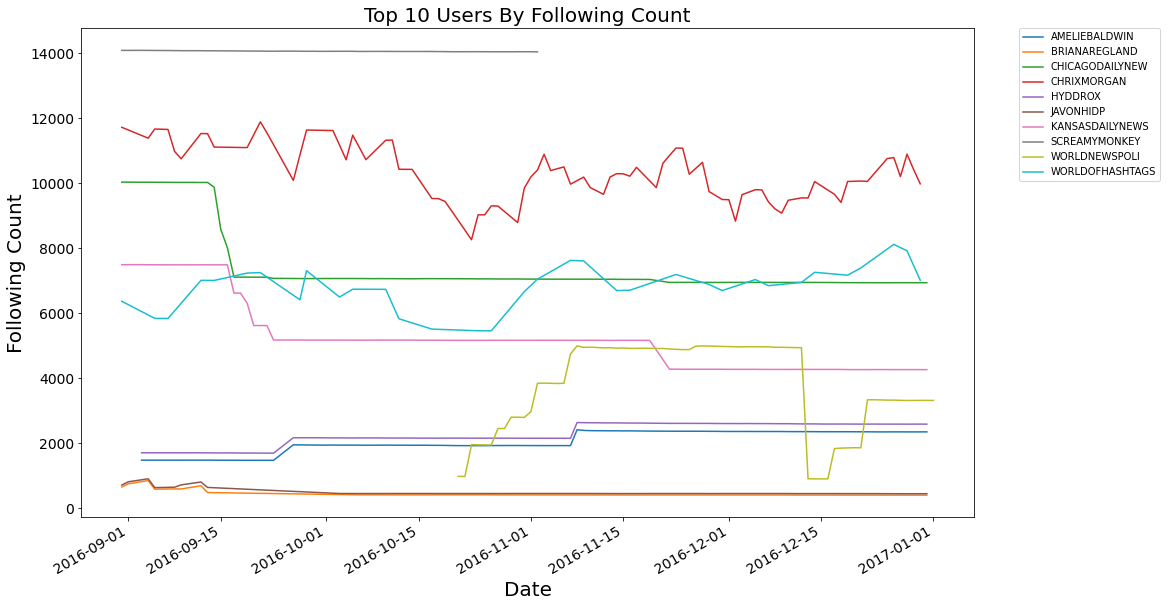

In [56]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pp, x='date', y='following', hue='author')

#Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Top 10 Users By Following Count',size=20)
plt.xlabel('Date',size=20)
plt.ylabel('Following Count',size=20)
plt.yticks(size=15)
plt.xticks(size=14,rotation=30,ha='right')
plt.yticks(size=14)

plt.show()

In [58]:
# Notice the double @ symbols for 2 reference.
tweets_df.loc[7,'content_without_http']

'@SenatorMenendez @CarmenYulinCruz Doesnt matter that CNN doesnt report on your crimes. This wont change the fact that youre going down.'

# **Create Hashtags and Retweet columns:**

We have some simple solutions but there are issues: This works but provides us with only first occurence **tweets_df** **['content_without_http'].str.extract**
**(r'@(\S+)')**

If we need to find more: use **extractall()** unfortunately it returns multi-index table and difficult to use.

Therefore,I used a loop to deal with this.Unless,you have a good work around beware of limitations as well as your options

In [48]:
tweets_df=tweets_df.drop(['content'],axis=1)
tweets_df.tail()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,alt_external_id,tweet_id,article_url,File_Name,content_without_http
2946202,POLITICS_T0DAY,United States,Russian,2/16/2016 22:20,92,887,12934,Other_tweet,Russian,0,NonEnglish,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Порошенко призвал к полной перезагрузке правит...
2946203,POLITICS_T0DAY,United States,Russian,2/16/2016 22:25,92,887,12935,Other_tweet,Russian,0,NonEnglish,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,Турецкая атомная бомба появится в 2023 году. ...
2946204,POLITICS_T0DAY,United States,Russian,2/16/2016 22:31,92,887,12936,Other_tweet,Russian,0,NonEnglish,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,История одной татуировки. Тату на предплечье:...
2946205,POLITICS_T0DAY,United States,Russian,2/16/2016 22:35,92,887,12937,Other_tweet,Russian,0,NonEnglish,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,"Индонезия, Китай, золото и isis #Эксклюзив@pol..."
2946206,POLITICS_T0DAY,United States,Russian,2/16/2016 22:40,92,887,12938,Other_tweet,Russian,0,NonEnglish,2260338140,699725139705987072,http://twitter.com/politics_t0day/statuses/699...,IRAhandle_tweets_9.csv,На популярном видеохостинге YouTube опубликова...


In [51]:
round(tweets_df['retweet'].mean(),3)
tweets_df['publish_date']=pd.to_datetime(tweets_df['publish_date'],
                                         infer_datetime_format=True)

tweets_df['publish_date'].\
dt.strftime('%H')

0          19
1          22
2          22
3          23
4          02
           ..
2946202    22
2946203    22
2946204    22
2946205    22
2946206    22
Name: publish_date, Length: 2946206, dtype: object

In [52]:
# Convert str to date/time with pandas
tweets_df['publish_date']=pd.to_datetime(tweets_df['publish_date'],
                                        infer_datetime_format=True)

tweets_df.sort_values('publish_date',ascending=True)

# Change formating to US dates
tweets_df['publish_date_Only']=tweets_df['publish_date'].\
dt.strftime('%m/%d/%Y')

tweets_df['time']=tweets_df['publish_date'].\
dt.strftime('%H')

In [54]:
tweets_df['publish_date_Only']=pd.to_datetime(tweets_df['publish_date_Only'],
                                        infer_datetime_format=True)

# get range to encapsulate before and after election 2016
mask = (tweets_df['publish_date_Only'] > '08/31/2016') &\
(tweets_df['publish_date_Only']  <= '01/01/02017')

In [55]:
troll_dt_rng=tweets_df[tweets_df["publish_date_Only"].isin(pd.date_range('2016-10-01', '2017-01-01'))].\
sort_values('publish_date_Only')

In [61]:
#Use this to parse Hastags and @user

def tweet_col_regx(df_col,re_pat):
  q=[]
  for i in df_col:
    if type(i)==str and re.findall(re_pat,i):
      q.append(re.findall(re_pat,i))
    else:
      q.append('None')
    return q

In [65]:
# extract name of user after the @ symbol:

tweet_ref=tweet_col_regx(troll_dt_rng['content_without_http'],r'@(\S+)')